## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import os

import tensorflow as tf
from tensorflow import keras

## Model Configuration

In [ ]:
window_size = 7
batch_size = 32
shuffle_buffer_size = 1000

epochs = 100

## API to Get Data

In [ ]:
api_key = 'JTU5ZLRZQK4D1X0P'
ticker = 'AAPL'
interval = 'DAILY'
df = pd.read_csv(f'https://www.alphavantage.co/query?function=TIME_SERIES_{interval}_ADJUSTED&symbol={ticker}&outputsize=full&datatype=csv&apikey={api_key}')

## Displaying Data

In [ ]:
df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2023-03-17,156.080,156.740,154.28,155.00,155.000000,98944633,0.0,1.0
1,2023-03-16,152.160,156.460,151.64,155.85,155.850000,76254419,0.0,1.0
2,2023-03-15,151.190,153.245,149.92,152.99,152.990000,77167866,0.0,1.0
3,2023-03-14,151.280,153.400,150.10,152.59,152.590000,73695893,0.0,1.0
4,2023-03-13,147.805,153.140,147.70,150.47,150.470000,84457122,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5877,1999-11-05,84.620,88.370,84.00,88.31,0.670165,3721500,0.0,1.0
5878,1999-11-04,82.060,85.370,80.62,83.62,0.634574,3384700,0.0,1.0
5879,1999-11-03,81.620,83.250,81.00,81.50,0.618485,2932700,0.0,1.0
5880,1999-11-02,78.000,81.690,77.31,80.25,0.608999,3564600,0.0,1.0


## Splitting Data Into Train and Test Set

In [ ]:
train_df = df[(df['timestamp'] >= '2017-01-01') & (df['timestamp'] < '2022-01-01')]
train_df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
303,2021-12-31,178.085,179.2300,177.26,177.57,176.054247,61661433,0.0,1.0
304,2021-12-30,179.470,180.5700,178.09,178.20,176.678869,59773014,0.0,1.0
305,2021-12-29,179.330,180.6300,178.14,179.38,177.848797,62348931,0.0,1.0
306,2021-12-28,180.160,181.3300,178.53,179.29,177.759565,79144339,0.0,1.0
307,2021-12-27,177.085,180.4200,177.07,180.33,178.790688,74919582,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1557,2017-01-09,117.950,119.4300,117.94,118.99,27.758430,33561948,0.0,1.0
1558,2017-01-06,116.780,118.1600,116.47,117.91,27.506484,31751900,0.0,1.0
1559,2017-01-05,115.920,116.8642,115.81,116.61,27.203215,22193587,0.0,1.0
1560,2017-01-04,115.850,116.5100,115.75,116.02,27.065577,21118116,0.0,1.0


In [ ]:
test_df = df[(df['timestamp'] >= '2022-01-01') & (df['timestamp'] < '2023-01-01')]
test_df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
52,2022-12-30,128.41,129.9500,127.43,129.93,129.732407,77034209,0.0000,1.0
53,2022-12-29,127.99,130.4814,127.73,129.61,129.412894,75703710,0.0000,1.0
54,2022-12-28,129.67,131.0275,125.87,126.04,125.848323,85438391,0.0000,1.0
55,2022-12-27,131.38,131.4100,128.72,130.03,129.832255,69007830,0.0000,1.0
56,2022-12-23,130.92,132.4150,129.64,131.86,131.659472,63814893,0.1667,1.0
...,...,...,...,...,...,...,...,...,...
298,2022-01-07,172.89,174.1400,171.03,172.17,170.700342,86709147,0.0000,1.0
299,2022-01-06,172.70,175.3000,171.64,172.00,170.531793,96903955,0.0000,1.0
300,2022-01-05,179.61,180.1700,174.64,174.92,173.426868,94537602,0.0000,1.0
301,2022-01-04,182.63,182.9400,179.12,179.70,178.166065,99310438,0.0000,1.0


## Plotting Train Set

In [ ]:
train_series = train_df['close'].to_list()[::-1]
train_time = train_df['timestamp'].to_list()[::-1]
train_time = [date.fromisoformat(time) for time in train_time]

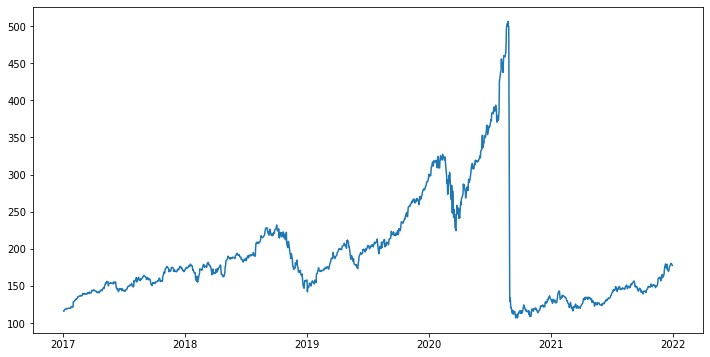

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_time, train_series)
plt.show()

## Plotting Test Set

In [ ]:
test_series = test_df['close'].to_list()[::-1]
test_time = test_df['timestamp'].to_list()[::-1]
test_time = [date.fromisoformat(time) for time in test_time]

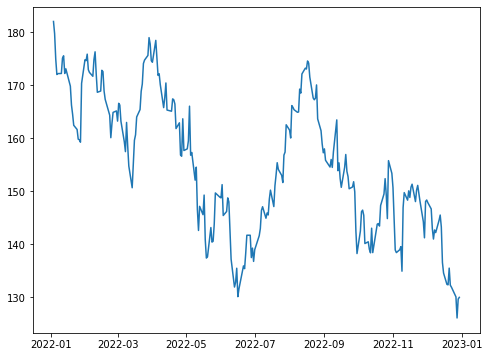

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(test_time, test_series)
plt.show()

## Generating Windowed (Time Series) Datasets

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer, do_shuffle=False):
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    if do_shuffle:
        dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [ ]:
train_dataset = windowed_dataset(train_series, window_size, batch_size, shuffle_buffer_size, do_shuffle=True)
test_dataset = windowed_dataset(test_series, window_size, batch_size, shuffle_buffer_size)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


## Creating Model and Training It

In [ ]:
model = keras.models.Sequential([
  keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation='relu',
                      padding='causal',
                      input_shape=[window_size, 1]),

  keras.layers.LSTM(64, return_sequences=True),
  keras.layers.LSTM(64),
  keras.layers.Dense(30, activation='relu'),
  keras.layers.Dense(10, activation='relu'),
  keras.layers.Dense(1),
])

model.compile(loss='mae', optimizer='adam')
history = model.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/100
40/40 [==============================] - 19s 124ms/step - loss: 184.1205 - val_loss: 139.8823
Epoch 2/100
40/40 [==============================] - 1s 20ms/step - loss: 167.2760 - val_loss: 120.7420
Epoch 3/100
40/40 [==============================] - 1s 18ms/step - loss: 144.5319 - val_loss: 93.1627
Epoch 4/100
40/40 [==============================] - 1s 19ms/step - loss: 111.4398 - val_loss: 53.6611
Epoch 5/100
40/40 [==============================] - 1s 22ms/step - loss: 68.4924 - val_loss: 11.4045
Epoch 6/100
40/40 [==============================] - 1s 24ms/step - loss: 48.4939 - val_loss: 16.2892
Epoch 7/100
40/40 [==============================] - 1s 13ms/step - loss: 47.4957 - val_loss: 18.3293
Epoch 8/100
40/40 [==============================] - 1s 15ms/step - loss: 47.4591 - val_loss: 17.4534
Epoch 9/100
40/40 [==============================] - 1s 19ms/step - loss: 47.4427 - val_loss: 17.9683
Epoch 10/100
40/40 [==============================] - 1s 17ms/step - loss:

## Generating Predictions and Plotting Them Against Test Data

In [ ]:
forecast = model.predict(test_dataset)

8/8 [==============================] - 1s 7ms/step


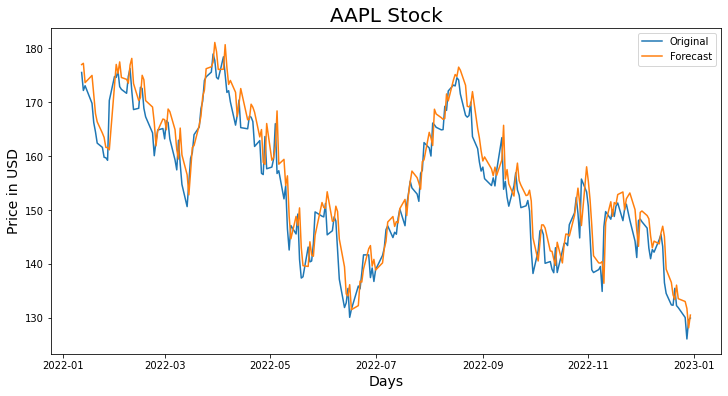

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_time[window_size:], test_series[window_size:], label='Original')
plt.plot(test_time[window_size:], forecast, label='Forecast')
plt.legend()
plt.xlabel('Days', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.title(f'{ticker} Stock', fontsize=20)
plt.show()

## Saving Model to Colab

In [ ]:
save_dir = 'model'
model.save(save_dir)

## Downloading Model from Colab

In [ ]:
!zip -r model.zip {path_to_model}

updating: model/stock_predictor/ (stored 0%)
updating: model/stock_predictor/variables/ (stored 0%)
updating: model/stock_predictor/variables/variables.data-00000-of-00001 (deflated 11%)
updating: model/stock_predictor/variables/variables.index (deflated 65%)
updating: model/stock_predictor/fingerprint.pb (stored 0%)
updating: model/stock_predictor/assets/ (stored 0%)
updating: model/stock_predictor/saved_model.pb (deflated 90%)
updating: model/stock_predictor/keras_metadata.pb (deflated 91%)


In [ ]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>